In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ENTRENAMIENTO DE MODELOS

In [98]:
df_resultado = pd.read_parquet('../data/processed/completo_df_v2.parquet')
print(df_resultado.head())
print(df_resultado.info())

   COD_PERSONA  COD_ALUMNO SEXO PER_INGRESO ESTADO_CIVIL  \
0         7085       14334    M     2011-01            S   
1         7085       14334    M     2011-01            S   
2         7085       14334    M     2011-01            S   
3         7085       14334    M     2011-01            S   
4         7085       14334    M     2011-01            S   

                  TIPO_COLEGIO  PTJE_INGRESO    ESTADO  SEM_CURSADOS  \
0  Pública otro Sector Público         120.0  Separado            16   
1  Pública otro Sector Público         120.0  Separado            16   
2  Pública otro Sector Público         120.0  Separado            16   
3  Pública otro Sector Público         120.0  Separado            16   
4  Pública otro Sector Público         120.0  Separado            16   

   CANT_RESERVAS  ... NOTA_MEDIAN_CLUSTER_HIST NOTA_Q1_CLUSTER_HIST  \
0              0  ...                      0.0                  0.0   
1              0  ...                      0.0                  

In [99]:
df_resultado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27002 entries, 0 to 27001
Data columns (total 57 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   COD_PERSONA                     27002 non-null  int64  
 1   COD_ALUMNO                      27002 non-null  int64  
 2   SEXO                            27002 non-null  object 
 3   PER_INGRESO                     27002 non-null  object 
 4   ESTADO_CIVIL                    27002 non-null  object 
 5   TIPO_COLEGIO                    27002 non-null  object 
 6   PTJE_INGRESO                    27002 non-null  float64
 7   ESTADO                          27002 non-null  object 
 8   SEM_CURSADOS                    27002 non-null  int64  
 9   CANT_RESERVAS                   27002 non-null  int64  
 10  PER_MATRICULA                   27002 non-null  object 
 11  COD_CURSO                       27002 non-null  object 
 12  CURSO                           

In [100]:
df_reducido = df_resultado.drop([
    'HRS_INASISTENCIA_ACUM_PASADO_x',
    'COD_PERSONA',
    'COD_ALUMNO', 
    'ESTADO',
    'CURSO',
    'COD_PLAN',
    'COD_GRUPO',
    'GRUPO',
    'APROBO',
    'HRS_INASISTENCIA',
    'PRCTJE_INASISTENCIA',
    'CRED_GRADUACION',
    'CODIGO_x',
    'HRS_INASISTENCIA_ACUM',
    'HRS_INASISTENCIA_ACUM_PASADO_x',
    'HRS_INASISTENCIA_PERIODO'
], axis=1)

In [101]:
df_reducido

,SEXO,PER_INGRESO,ESTADO_CIVIL,TIPO_COLEGIO,PTJE_INGRESO,SEM_CURSADOS,CANT_RESERVAS,PER_MATRICULA,COD_CURSO,CREDITOS,...,PROM_POND_CLUSTER_HIST,NOTA_MAX_CLUSTER_HIST,NOTA_MIN_CLUSTER_HIST,NOTA_MEDIAN_CLUSTER_HIST,NOTA_Q1_CLUSTER_HIST,NOTA_Q3_CLUSTER_HIST,ASIST_PROM_CLUSTER_HIST,CRED_APROB_CLUSTER_HIST,HRS_INASISTENCIA_ACUM_PASADO_y,ESTADO_PASADO
0,M,2011-01,S,Pública otro Sector Público,120.0,16,0,2011-01,CS113,4,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,Regular
1,M,2011-01,S,Pública otro Sector Público,120.0,16,0,2011-01,CS100,3,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,Regular
2,M,2011-01,S,Pública otro Sector Público,120.0,16,0,2011-01,CS211,4,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,Regular
3,M,2011-01,S,Pública otro Sector Público,120.0,16,0,2011-01,FG106,2,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,Regular
4,M,2011-01,S,Pública otro Sector Público,120.0,16,0,2011-02,CS210,4,...,13.0414,14.2,14.2,14.2,14.2,14.2,0.7,4.0,57.0,Separado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26997,M,2020-02,S,Privada Parroquial,170.0,1,0,2020-02,CS111,4,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Separado
26998,M,2020-02,S,Privada Parroquial,170.0,1,0,2020-02,MA100,5,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Separado
26999,M,2020-02,S,Privada Parroquial,170.0,1,0,2020-02,FG103,3,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Separado
27000,M,2020-02,S,Privada Parroquial,170.0,1,0,2020-02,FG102,3,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Separado


In [102]:
df_reducido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27002 entries, 0 to 27001
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   SEXO                            27002 non-null  object 
 1   PER_INGRESO                     27002 non-null  object 
 2   ESTADO_CIVIL                    27002 non-null  object 
 3   TIPO_COLEGIO                    27002 non-null  object 
 4   PTJE_INGRESO                    27002 non-null  float64
 5   SEM_CURSADOS                    27002 non-null  int64  
 6   CANT_RESERVAS                   27002 non-null  int64  
 7   PER_MATRICULA                   27002 non-null  object 
 8   COD_CURSO                       27002 non-null  object 
 9   CREDITOS                        27002 non-null  int64  
 10  TIPO_CURSO                      27002 non-null  object 
 11  NOTA                            27002 non-null  float64
 12  HRS_CURSO                       

In [103]:
df_reducido['TIPO_COLEGIO'].unique()

array(['Pública otro Sector Público', 'Privada Particular',
       'Pública Sector Educación', 'Pública en Convenio',
       'Privada Parroquial', 'Fuera del Perú', 'Privada Fiscalizada',
       'Privada Instituciones Benéficas'], dtype=object)

In [104]:
import pandas as pd

def analizar_categoricas(df, top_n=5, verbose=True):
    """
    Analiza la cardinalidad y distribución de las variables categóricas de un DataFrame.

    Parámetros:
    - df: DataFrame de entrada
    - top_n: número de categorías más frecuentes a mostrar por variable
    - verbose: si True, muestra detalles por pantalla
    
    Retorna:
    - resumen_df: DataFrame con información de cardinalidad y frecuencias
    """
    # Detectar columnas categóricas
    cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
    resumen = []

    for col in cat_cols:
        n_unicos = df[col].nunique()
        n_nulls = df[col].isna().sum()
        mas_frecuentes = df[col].value_counts(normalize=True).head(top_n)
        top_categorias = mas_frecuentes.index.tolist()
        top_pct = mas_frecuentes.sum() * 100
        valor_mas_frec = mas_frecuentes.index[0]
        freq_mas_frec = mas_frecuentes.iloc[0] * 100

        resumen.append({
            "columna": col,
            "cardinalidad": n_unicos,
            "nulos": n_nulls,
            "valor_mas_frec": valor_mas_frec,
            "freq_%_valor_mas_frec": round(freq_mas_frec, 2),
            f"%_{top_n}_categorias": round(top_pct, 2),
            "categorias_mas_frecuentes": ", ".join(top_categorias)
        })
    
    resumen_df = pd.DataFrame(resumen).sort_values(by="cardinalidad", ascending=False)

    if verbose:
        print(f"\n🔍 Columnas categóricas encontradas: {len(cat_cols)}\n")
        display(resumen_df)

    return resumen_df


# --- USO ---
resumen_categoricas = analizar_categoricas(df_reducido)



🔍 Columnas categóricas encontradas: 12



,columna,cardinalidad,nulos,valor_mas_frec,freq_%_valor_mas_frec,%_5_categorias,categorias_mas_frecuentes
7,FECHA_NACIMIENTO,985,0,1995-04-24,0.58,2.69,"1995-04-24, 1992-08-15, 1996-07-20, 1998-01-13..."
5,COD_CURSO,71,0,MA100,7.01,25.22,"MA100, CS1D1, FG101, FG102, CS112"
10,CODIGO_y,71,0,MA100,7.01,25.22,"MA100, CS1D1, FG101, FG102, CS112"
4,PER_MATRICULA,29,0,2020-01,6.98,31.88,"2020-01, 2019-01, 2020-02, 2018-01, 2019-02"
1,PER_INGRESO,20,0,2011-01,11.17,46.89,"2011-01, 2014-01, 2016-01, 2013-01, 2017-01"
3,TIPO_COLEGIO,8,0,Privada Particular,63.21,99.16,"Privada Particular, Pública Sector Educación, ..."
11,ESTADO_PASADO,7,0,Regular,47.32,96.29,"Regular, Separado, Egresado, Abandono, Retirado"
9,FAMILIA,6,0,CS,48.93,99.98,"CS, FG, MA, ET, CB"
6,TIPO_CURSO,3,0,O,94.65,100.00,"O, EH, EP"
0,SEXO,2,0,M,83.60,100.00,"M, F"


In [105]:
import pandas as pd

def codificar_tipo_colegio(df):
    """
    Codifica la columna TIPO_COLEGIO con valores numéricos fijos.
    """
    mapa_colegio = {
        'Pública otro Sector Público': 0,
        'Pública Sector Educación': 1,
        'Pública en Convenio': 2,
        'Privada Particular': 3,
        'Privada Parroquial': 4,
        'Privada Fiscalizada': 5,
        'Privada Instituciones Benéficas': 6,
        'Fuera del Perú': 7
    }
    
    df["TIPO_COLEGIO_COD"] = df["TIPO_COLEGIO"].map(mapa_colegio)
    return df


def convertir_periodo_a_num(periodo_str):
    """
    Convierte un valor tipo 'YYYY-0X' en un número continuo.
    Ejemplo: 2019-0 -> 2019, 2019-1 -> 2019.2, 2019-2 -> 2019.6
    """
    if not isinstance(periodo_str, str) or '-' not in periodo_str:
        return None
    try:
        año, ciclo = periodo_str.split('-')
        año = int(año)
        ciclo = int(ciclo)
        if ciclo == 0:
            return año
        elif ciclo == 1:
            return año + 0.2
        elif ciclo == 2:
            return año + 0.6
    except:
        return None


def procesar_periodos(df):
    """
    Aplica la conversión de periodo a número en PER_INGRESO y PER_MATRICULA.
    """
    df["PER_INGRESO_NUM"] = df["PER_INGRESO"].apply(convertir_periodo_a_num)
    df["PER_MATRICULA_NUM"] = df["PER_MATRICULA"].apply(convertir_periodo_a_num)
    return df


# === USO ===
df = codificar_tipo_colegio(df_reducido)
df = procesar_periodos(df)

# Verificar resultados
print(df[["TIPO_COLEGIO", "TIPO_COLEGIO_COD", "PER_INGRESO", "PER_INGRESO_NUM", "PER_MATRICULA", "PER_MATRICULA_NUM"]].head())


                  TIPO_COLEGIO  TIPO_COLEGIO_COD PER_INGRESO  PER_INGRESO_NUM  \
0  Pública otro Sector Público                 0     2011-01           2011.2   
1  Pública otro Sector Público                 0     2011-01           2011.2   
2  Pública otro Sector Público                 0     2011-01           2011.2   
3  Pública otro Sector Público                 0     2011-01           2011.2   
4  Pública otro Sector Público                 0     2011-01           2011.2   

  PER_MATRICULA  PER_MATRICULA_NUM  
0       2011-01             2011.2  
1       2011-01             2011.2  
2       2011-01             2011.2  
3       2011-01             2011.2  
4       2011-02             2011.6  


In [106]:
df = df.drop(['PER_INGRESO','PER_MATRICULA','PER_NUM','TIPO_COLEGIO','CODIGO_y'], axis=1, errors='ignore')

In [107]:
df.iloc[:, 30:].head(20)

,NOTA_MIN_CLUSTER_HIST,NOTA_MEDIAN_CLUSTER_HIST,NOTA_Q1_CLUSTER_HIST,NOTA_Q3_CLUSTER_HIST,ASIST_PROM_CLUSTER_HIST,CRED_APROB_CLUSTER_HIST,HRS_INASISTENCIA_ACUM_PASADO_y,ESTADO_PASADO,TIPO_COLEGIO_COD,PER_INGRESO_NUM,PER_MATRICULA_NUM
0,0.00,0.000,0.0000,0.0000,0.0,0.0,30.0,Regular,0,2011.2,2011.2
1,0.00,0.000,0.0000,0.0000,0.0,0.0,30.0,Regular,0,2011.2,2011.2
2,0.00,0.000,0.0000,0.0000,0.0,0.0,30.0,Regular,0,2011.2,2011.2
3,0.00,0.000,0.0000,0.0000,0.0,0.0,30.0,Regular,0,2011.2,2011.2
4,14.20,14.200,14.2000,14.2000,0.7,4.0,57.0,Separado,0,2011.2,2011.6
5,0.00,0.000,0.0000,0.0000,0.0,0.0,57.0,Separado,0,2011.2,2011.6
6,0.00,0.000,0.0000,0.0000,0.0,0.0,57.0,Separado,0,2011.2,2011.6
7,10.20,13.360,11.7800,14.9400,0.7,2.0,57.0,Separado,0,2011.2,2011.6
8,10.20,13.360,11.7800,14.9400,0.7,2.0,57.0,Separado,0,2011.2,2011.6
9,14.20,14.275,14.2375,14.3125,0.7,8.0,95.0,Separado,0,2011.2,2012.2


In [108]:
# === Conversiones binarias ===

# SEXO: M -> 0, F -> 1
df["SEXO"] = df["SEXO"].map({"M": 0, "F": 1})

# ESTADO_CIVIL: S -> 0, C -> 1
df["ESTADO_CIVIL"] = df["ESTADO_CIVIL"].map({"S": 0, "C": 1})

# TIPO_CURSO: O -> 0, EP/EH -> 1
df["TIPO_CURSO"] = df["TIPO_CURSO"].apply(lambda x: 0 if x == "O" else 1)

# TIPO_CICLO: Regular -> 0, Verano -> 1
df["TIPO_CICLO"] = df["TIPO_CICLO"].map({"Regular": 0, "Verano": 1})

# === Verificar que las conversiones sean correctas ===
print(df[["SEXO", "ESTADO_CIVIL", "TIPO_CURSO", "TIPO_CICLO"]].head())


   SEXO  ESTADO_CIVIL  TIPO_CURSO  TIPO_CICLO
0     0             0           0           0
1     0             0           0           0
2     0             0           0           0
3     0             0           0           0
4     0             0           0           0


In [109]:
import pandas as pd

# Asegurarse de que la columna sea tipo datetime
df["FECHA_NACIMIENTO"] = pd.to_datetime(df["FECHA_NACIMIENTO"], errors="coerce")

# Convertir a valor numérico: AÑO + MES/12 + DÍA/30
df["FECHA_NACIMIENTO_NUM"] = (
    df["FECHA_NACIMIENTO"].dt.year
    + df["FECHA_NACIMIENTO"].dt.month / 12
    + df["FECHA_NACIMIENTO"].dt.day / 12 / 30
)

# Si quieres eliminar la columna original:
# df.drop(columns=["FECHA_NACIMIENTO"], inplace=True)

# Verificar el resultado
print(df[["FECHA_NACIMIENTO", "FECHA_NACIMIENTO_NUM"]].head())


  FECHA_NACIMIENTO  FECHA_NACIMIENTO_NUM
0       1991-01-26           1991.155556
1       1991-01-26           1991.155556
2       1991-01-26           1991.155556
3       1991-01-26           1991.155556
4       1991-01-26           1991.155556


In [110]:
df = df.drop(['PER_INGRESO','PER_MATRICULA','PER_NUM','TIPO_COLEGIO','CODIGO_y', "FECHA_NACIMIENTO"], axis=1, errors='ignore')

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27002 entries, 0 to 27001
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   SEXO                            27002 non-null  int64  
 1   ESTADO_CIVIL                    27002 non-null  int64  
 2   PTJE_INGRESO                    27002 non-null  float64
 3   SEM_CURSADOS                    27002 non-null  int64  
 4   CANT_RESERVAS                   27002 non-null  int64  
 5   COD_CURSO                       27002 non-null  object 
 6   CREDITOS                        27002 non-null  int64  
 7   TIPO_CURSO                      27002 non-null  int64  
 8   NOTA                            27002 non-null  float64
 9   HRS_CURSO                       27002 non-null  int64  
 10  PONDERADO                       27002 non-null  float64
 11  BECA_VIGENTE                    27002 non-null  int64  
 12  POBREZA_RES                     

In [112]:
# df['TIPO_COLEGIO_COD'].unique()

In [113]:
import pandas as pd

# --- 1. Versión para LightGBM ---
df_lgbm = df.copy()

# Asegurar que CLUSTER_CURSO sea categórica
df_lgbm["CLUSTER_CURSO"] = df_lgbm["CLUSTER_CURSO"].astype("category")

print("LightGBM dataset:")
print(df_lgbm["CLUSTER_CURSO"].dtype)
print(df_lgbm["CLUSTER_CURSO"].cat.categories)

# --- 2. Versión con One-Hot Encoding ---
df_onehot = pd.get_dummies(df, columns=["CLUSTER_CURSO"], prefix="CLUSTER_CURSO")

print("\nRegresión (one-hot) dataset:")
print(df_onehot.filter(like="CLUSTER_CURSO_").columns)
print(f"Dimensiones: {df_onehot.shape}")

LightGBM dataset:
category
Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int32')

Regresión (one-hot) dataset:
Index(['CLUSTER_CURSO_0', 'CLUSTER_CURSO_1', 'CLUSTER_CURSO_2',
       'CLUSTER_CURSO_3', 'CLUSTER_CURSO_4', 'CLUSTER_CURSO_5',
       'CLUSTER_CURSO_6', 'CLUSTER_CURSO_7'],
      dtype='object')
Dimensiones: (27002, 48)


In [114]:
df['COD_CURSO']

0        CS113
1        CS100
2        CS211
3        FG106
4        CS210
         ...  
26997    CS111
26998    MA100
26999    FG103
27000    FG102
27001    FG101
Name: COD_CURSO, Length: 27002, dtype: object

Columnas categóricas usadas por LightGBM: ['COD_CURSO', 'FAMILIA', 'CLUSTER_CURSO', 'ESTADO_PASADO']
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003886 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4792
[LightGBM] [Info] Number of data points in the train set: 21623, number of used features: 39
[LightGBM] [Info] Start training from score 11.559427
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[571]	valid_0's rmse: 2.74244	valid_0's l2: 7.521

=== Resultados LightGBM ===
MAE:  1.9489
RMSE: 2.7424
R²:   0.6021


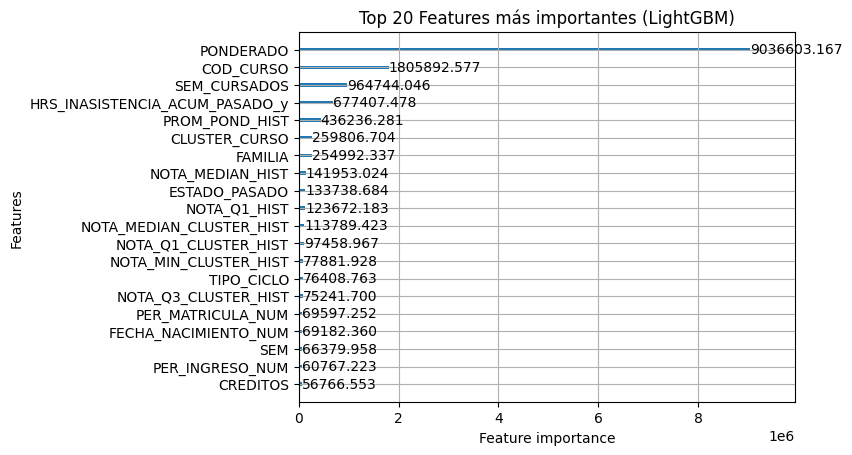

In [137]:
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

categorical_cols = [
    "COD_CURSO", "FAMILIA", "ESTADO_PASADO", "CLUSTER_CURSO"
]

for col in categorical_cols:
    df_lgbm[col] = df_lgbm[col].astype("category")

X = df_lgbm.drop(columns=["NOTA"])
y = df_lgbm["NOTA"]

# ==========================
# 2️⃣ División temporal
# ==========================
X_train = X[X["PER_MATRICULA_NUM"] <= 2019.2]
y_train = y[X["PER_MATRICULA_NUM"] <= 2019.2]
X_test = X[X["PER_MATRICULA_NUM"] > 2019.2]
y_test = y[X["PER_MATRICULA_NUM"] > 2019.2]

categorical_in_X = X_train.select_dtypes(["category"]).columns.tolist()
print(f"Columnas categóricas usadas por LightGBM: {categorical_in_X}")

# ==========================
# 3️⃣ Entrenar modelo
# ==========================
model_lgb = lgb.LGBMRegressor(
    n_estimators=580,
    learning_rate=0.01,
    num_leaves=26,
    max_depth=-1,
    subsample=0.6,
    colsample_bytree=0.6,
    random_state=42
)

model_lgb.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    eval_metric="rmse",
    callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=True)],
    categorical_feature=categorical_in_X
)

# ==========================
# 4️⃣ Evaluar desempeño
# ==========================
y_pred = model_lgb.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n=== Resultados LightGBM ===")
print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")

# ==========================
# 5️⃣ Importancia de variables
# ==========================
lgb.plot_importance(model_lgb, max_num_features=20, importance_type="gain")
plt.title("Top 20 Features más importantes (LightGBM)")
plt.show()


In [140]:
print(df_lgbm.describe())

               SEXO  ESTADO_CIVIL  PTJE_INGRESO  SEM_CURSADOS  CANT_RESERVAS  \
count  27002.000000  27002.000000  27002.000000  27002.000000    27002.00000   
mean       0.163951      0.001222    140.899378      9.039960        0.34853   
std        0.370238      0.034938     50.402654      5.526406        0.85860   
min        0.000000      0.000000     60.000000      1.000000        0.00000   
25%        0.000000      0.000000    120.000000      4.000000        0.00000   
50%        0.000000      0.000000    128.000000      8.000000        0.00000   
75%        0.000000      0.000000    143.000000     14.000000        0.00000   
max        1.000000      1.000000    428.000000     24.000000        6.00000   

           CREDITOS    TIPO_CURSO          NOTA     HRS_CURSO     PONDERADO  \
count  27002.000000  27002.000000  27002.000000  27002.000000  27002.000000   
mean       3.426080      0.053515     11.839353      4.899193     11.648816   
std        0.899138      0.225061      4.3